# Surface Wave Dispersion

Using a cosine transform, this construction for the $n$'th mode is
$$
  f_0(x,t) = \frac{1}{\pi} \int_{\omega_0 - 1/2 \Delta w}^{\omega_0 + 1/2 \Delta w}
             \cos (\omega t - k_n(\omega) x) d \omega
$$
For small $\Delta \omega$, we can expand $k_n(\omega)$ in a Taylor series, 
$$
  k_n(\omega) = k_n(\omega_0)
              + \left (\frac{d k_n}{d \omega} \right)_0(\omega - \omega_0) + \cdots
              \approx k_n(\omega_0) + \left (\frac{d k_n}{d \omega} \right)_0(\omega - \omega_0)
$$
Inserting into the integral
$$
  f_0(x,t)
 =\frac{1}{\pi}
  \int
  \cos \left( \omega t - k_n(\omega_0) x + \left (\frac{d k_n}{d \omega} \right)_0(\omega - \omega_0 x) \right )
 =\frac{1}{\pi}
  \int 
  \cos \left ( \omega \left (t - \left (\frac{d k_n}{d \omega}\right)_0  x \right )
             - k_n(\omega_0) x + \left (\frac{d k_n}{d \omega}\right)_0  x \right ) d \omega
$$
This is really just the integral of 
$$\int \cos(a \omega + b) d \omega = \frac{1}{a} \sin (a \omega + b) $$ 
The corresponding integral, after evaluating at the integral limits, looks like
$$
\frac{1}{\pi \left(t -  \left(\frac{d k_n}{d \omega}\right)_0 x \right )}
\left [
  \sin \left ( \frac{\Delta \omega}{2} \left (t - \left ( \frac{d k_n}{d \omega}\right)_0 x \right ) 
             \omega_0 t - k_n(\omega_0) x \right ) d \omega
 -\sin \left (-\frac{\Delta \omega}{2} \left (t - \left ( \frac{d k_n}{d \omega}\right)_0 x \right )
             \omega_0 t - k_n(\omega_0) x \right ) d \omega
\right ]
$$

This can be simplified using
$$
  \sin ((a + b) x + \phi)
 -\sin ((a - b) x + \phi)
 =\sin (bx + ax + \phi) - \sin(-bx + ax + \phi)
 =\sin (C + A) + \sin(C - A)
 =2 \sin A \cos C
$$
Rewriting, we have
$$
  \frac{2}{\pi \left(t -  \left(\frac{d k_n}{d \omega}\right)_0 x \right )}
  \sin
  \left (
    \frac{\Delta \omega}{2} \left (t - \left ( \frac{d k_n}{d \omega}\right)_0 x \right ) 
  \right )
  \cos 
  \left (
    \omega_0 t - k_n (\omega_0) x
  \right )
$$
Now, make the substitution that
$$
  Y = \frac{\Delta \omega}{2}
      \left [t - \left ( \frac{d k_n}{d \omega}\right)_0 x \right ]
$$
which means that
$$
  f_0(x,t)
  \approx \frac{\Delta \omega}{\pi} \frac{\sin Y}{Y} \cos 
  \left (
    \omega_0 t - k_n (\omega_0) x
  \right )
$$
The idea here is that there is a cosine signal with frequency $\omega_0$ modulated by a $\frac{\sin Y}{Y}$ term.
Remember that $\left ( \frac{d \omega}{d k_n}\right)_0$ is the group velocity.  

This is actually fairly similar to [amplitude modulation](https://en.wikipedia.org/wiki/Frequency_modulation).

In [90]:
from numpy import pi
from numpy import linspace
from numpy import cos
from numpy import sin
from matplotlib import pyplot as plt

def disper(c, u, f0, df0, xd, gamma):
    """
    Plots the dispersed wave trains using Equation 7-11 of Aki and Richards.  
    
    Parameters
    ----------
    c :  float 
        Phase velocity = w0/k(w0) in km/s
    u :  float
        Group velocity = dw/dk in km/s
    f0 : float
        Reference frequency in Hz
    df0 : float
        Frequency over which dispersion relation remains linear (Hz)
    xd  : array_like
        Station distances in km
    gamma : float
        Generate a plot with time range [(1 - gamma)*t, (1+gamma)*t] where t is the 
        time for the group arrival.
        
    
    Copyright
    ---------
    This was originally written by Ken Creager and translated to Python by Ben Baker.
    
    """
    w0 = 2.0*pi*f0
    dw0 = 2.0*pi*df0
    x0 = min(xd)
    x1 = max(xd)
    dt = 1.0/(20.0*f0) # Sampling period (s) - crank it up for plotting
    tlow = (1.0 - gamma)*x0/u # Start time (seconds)
    thi  = (1.0 + gamma)*x0/u # End time (seconds)
    nt = int((thi - tlow)/dt + 0.5) # Number of samples
    t = linspace(tlow, thi, nt) # Times at which to evaluate seismograms
    # Figure out the spacing
    if (len(xd) == 1):
        dx = 1.0
    else:
        dx = abs(xd[2] - xd[1])
    # For each distance tabulate a seismogram and envelope
    plt.figure(num=None, figsize=(10,10))
    for x in xd: #range(len(xd)):
        Y = dw0*(t - x/u)
        carrierWave1 = x + 0.5*dx*sin(Y)/Y # Envelope or carrier wave moving with group velocity u
        carrierWave2 = x - 0.5*dx*sin(Y)/Y # Envelope or carrier wave (plot negative to bound seism)
        seism = x + 0.5*dx*cos(w0*(t - x/c))*sin(Y)/Y # Seismogram moving with phase velocity c
        # Add the seismogram and enevlopes to the plot
        plt.plot(t, seism, 'black') # Plot the seismogram
        plt.plot(t, carrierWave1, c='b', linestyle='--')
        plt.plot(t, carrierWave2, c='b', linestyle='--')
    plt.xlim(tlow, thi)
    plt.yticks(xd)
    plt.grid(True)
    plt.title("Surface Wave Dispersion")
    plt.ylabel('Distance (km)')
    plt.xlabel('Time (s)')
    plt.show()

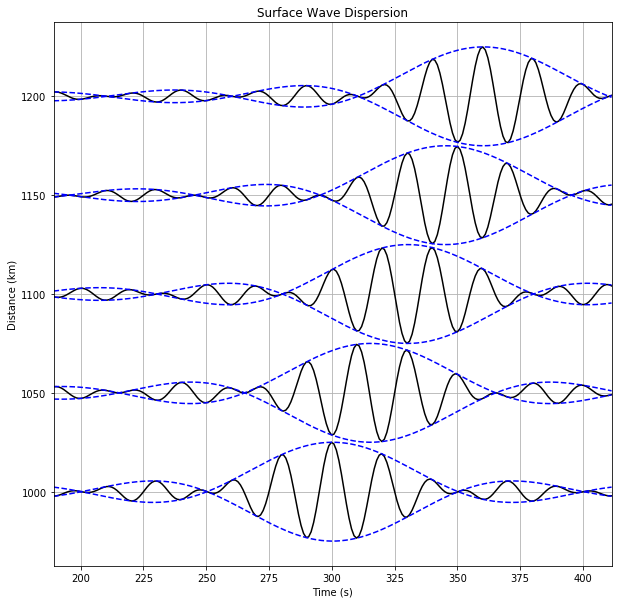

In [91]:
# Example of Ken's disper function
c  = 5.0  # Phase velocity (km/s)
u  = 3.33 # Group velocity (km/s)
f0 = 0.05 # Reference frequency (Hz)
df0 = 0.01 # Frequency over which dispersion relation remains linear (Hz)
xd = linspace(1000, 1200, 5) # Distances of stations (km)
gamma = 0.37
disper(c, u, f0, df0, xd, gamma)